In [15]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import csv

In [16]:
csvfile = open('cirrus-cpu-simple/data/output/node_utilization.csv', 'r')

csvreader = csv.reader(csvfile)
# Skip the header line
next(csvreader, None)
nodestate_l = []
for row in csvreader:
    nodestate_l.append(row)



maxtime = int(nodestate_l[-1][0]) + 1
print(maxtime)

nodeuse_l = [0 for i in range(maxtime)]

for row in nodestate_l:
    timestep = int(row[0])
    if row[2] == 'allocated':
        nodeuse_l[timestep] += 1

for i, x in enumerate(nodeuse_l):
    if i > 0:
        if x == 0:
            nodeuse_l[i] = nodeuse_l[i-1]

for row in nodestate_l:
    timestep = int(row[0])
    if timestep > 0 and row[2] == 'free':
        nodeuse_l[timestep] -= 1
    if nodeuse_l[timestep] < 0:
        nodeuse_l[timestep] = 0

14527


In [17]:
df = pd.DataFrame(nodeuse_l, columns=['Cores occupied'])

In [18]:
print(df)

       Cores occupied
0               10080
1               10008
2                   0
3                 144
4                 144
...               ...
14522              72
14523              72
14524              72
14525              72
14526               0

[14527 rows x 1 columns]


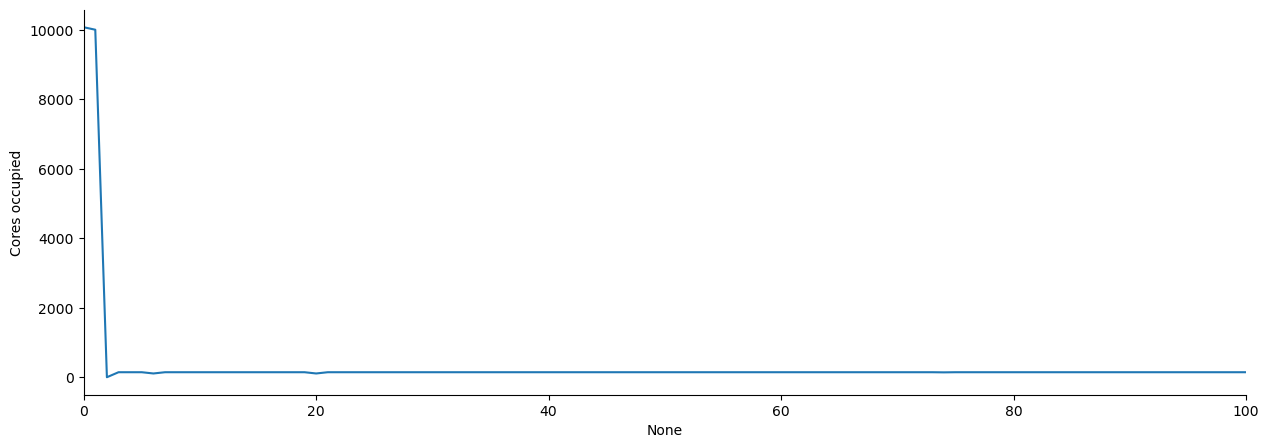

In [21]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x=df.index, y='Cores occupied')
plt.xlim([0,100])
sns.despine()

In [23]:
df_jobs = pd.read_csv('cirrus-cpu-simple/data/output/job_statistics.csv')
df_jobs.tail()

,ID,Type,Submit Time,Start Time,End Time,Wait Time,Makespan,Turnaround Time,Status
19995,19995,rigid,2173,2525,2529,352,4,356,completed
19996,19996,rigid,2173,2526,2535,353,9,362,completed
19997,19997,rigid,2173,2526,2531,353,5,358,completed
19998,19998,rigid,2173,2526,2527,353,1,354,completed
19999,19999,rigid,2173,2526,2528,353,2,355,completed
